# Euro 2024

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [84]:
# Setting this option will print all collumns of a dataframe
pd.set_option("display.max_columns", None)
# Limits output of decimals to 2 decimal places
pd.set_option("display.precision", 2)

# Load Euro 2024 Tournament Data into DataFrame
df = pd.read_csv("data/2024.csv")

In [85]:
df.head()

,id_match,home_team,away_team,home_team_code,away_team_code,home_score,away_score,home_penalty,away_penalty,home_score_total,away_score_total,winner,winner_reason,year,date,date_time,utc_offset_hours,group_name,matchday_name,condition_humidity,condition_pitch,condition_temperature,condition_weather,condition_wind_speed,status,type,round,round_mode,match_attendance,stadium_id,stadium_country_code,stadium_capacity,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,goals,penalties_missed,penalties,red_cards,game_referees,stadium_city,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_lineups,away_lineups,home_coaches,away_coaches,events
0,2036211,W49,W50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,2024-07-14,2024-07-14T19:00:00Z,2.0,NaN,MD7,NaN,NaN,NaN,NaN,NaN,UPCOMING,SINGLE,FINAL,FINAL,NaN,62875,GER,74244.0,52.51,13.24,105.0,68.0,NaN,NaN,NaN,NaN,[],Berlin,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,NaN,NaN,NaN,NaN,NaN
1,2036210,Netherlands,England,NED,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,2024-07-10,2024-07-10T19:00:00Z,2.0,NaN,MD6,NaN,NaN,NaN,NaN,NaN,UPCOMING,SINGLE,SEMIFINAL,KNOCK_OUT,NaN,57798,GER,81365.0,51.49,7.45,105.0,68.0,NaN,NaN,NaN,NaN,[],Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,Signal Iduna Park,NaN,NaN,NaN,NaN,NaN
2,2036209,Spain,France,ESP,FRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,2024-07-09,2024-07-09T19:00:00Z,2.0,NaN,MD6,NaN,NaN,NaN,NaN,NaN,UPCOMING,SINGLE,SEMIFINAL,KNOCK_OUT,NaN,85441,GER,75000.0,48.22,11.62,105.0,68.0,NaN,NaN,NaN,NaN,"[{'name': 'Paolo Valeri', 'role': 'ASSISTANT_V...",Munich,Munich Football Arena,Football Arena Munich,Fußball Arena München,Munich Football Arena,Allianz Arena,NaN,NaN,NaN,NaN,NaN
3,2036207,Netherlands,Türkiye,NED,TUR,2.0,1.0,NaN,NaN,2.0,1.0,Netherlands,WIN_REGULAR,2024,2024-07-06,2024-07-06T19:00:00Z,2.0,NaN,MD5,NaN,NaN,NaN,NaN,NaN,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,70091.0,62875,GER,74244.0,52.51,13.24,105.0,68.0,"[{'phase': 'FIRST_HALF', 'time': {'minute': 35...",NaN,NaN,"[{'phase': 'SECOND_HALF', 'time': {'injuryMinu...","[{'name': 'Clément Turpin', 'role': 'REFEREE',...",Berlin,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,"[{'country_code': 'NED', 'name': 'Justin Bijlo...","[{'country_code': 'TUR', 'name': 'Altay Bayınd...","[{'country_code': 'NED', 'country': 'Netherlan...","[{'country_code': 'ITA', 'country': 'Italy', '...",[{'id': 'c127c084-8277-4dfa-8c97-259c9333c770'...
4,2036208,England,Switzerland,ENG,SUI,1.0,1.0,5.0,3.0,1.0,1.0,England,WIN_ON_PENALTIES,2024,2024-07-06,2024-07-06T16:00:00Z,2.0,NaN,MD5,NaN,NaN,NaN,NaN,NaN,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,46907.0,1100174,GER,44559.0,51.26,6.73,105.0,68.0,"[{'phase': 'SECOND_HALF', 'time': {'minute': 7...",NaN,"[{'phase': 'PENALTY', 'time': {}, 'internation...",NaN,"[{'name': 'Adrian Ixari', 'role': 'UEFA_DELEGA...",Dusseldorf,Düsseldorf Arena,Düsseldorf Arena,Düsseldorf Arena,Düsseldorf Arena,ESPRIT arena,"[{'country_code': 'ENG', 'name': 'Aaron Ramsda...","[{'country_code': 'SUI', 'name': 'Yvon Mvogo',...","[{'country_code': 'ENG', 'country': 'England',...","[{'country_code': 'SUI', 'country': 'Switzerla...",[{'id': '49a9453c-0547-472d-a5d1-2ee97d5ce688'...


First, we will sort the dataframe, so that our dataframe starts with the first match of the UEFA Euro 2024 Tournament. Next, we will reset the index so that the first match corresponds to index 0, the second match to index 1, and so on. The result is a flipped dataframe with ascending index.

In [86]:
# sort dataframe entries by index, beginning with the highest index
df.sort_index(ascending=False, inplace=True)

# reset index, so that new indexing starts with the first match of the Euro 2024 Tournament
df.reset_index(drop=True, inplace=True)

The next cell will provide a concise summary of the DataFrame.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_match               51 non-null     int64  
 1   home_team              51 non-null     object 
 2   away_team              51 non-null     object 
 3   home_team_code         50 non-null     object 
 4   away_team_code         50 non-null     object 
 5   home_score             48 non-null     float64
 6   away_score             48 non-null     float64
 7   home_penalty           3 non-null      float64
 8   away_penalty           3 non-null      float64
 9   home_score_total       48 non-null     float64
 10  away_score_total       48 non-null     float64
 11  winner                 34 non-null     object 
 12  winner_reason          48 non-null     object 
 13  year                   51 non-null     int64  
 14  date                   51 non-null     object 
 15  date_tim

The columns 'date' and 'date_time' are currently object datatypes. As they contain date values, it is useful to convert them to datetime objects.

In [88]:
# convert datatypes to datetime objects
df["date"] = pd.to_datetime(df["date"])
df["date_time"] = pd.to_datetime(df["date_time"])

# datatypes of date columns after conversion
print("Datatype of 'date' column after conversion: ", df["date"].dtype)
print("Datatype of 'date_time' column after conversion: ", df["date_time"].dtype)

Datatype of 'date' column after conversion:  datetime64[ns]
Datatype of 'date_time' column after conversion:  datetime64[ns, UTC]


Next, we will examine some descriptive statistics.

In [89]:
# summary statistics for int and float datatypes
df.describe()

,id_match,home_score,away_score,home_penalty,away_penalty,home_score_total,away_score_total,year,date,utc_offset_hours,condition_humidity,condition_temperature,condition_wind_speed,match_attendance,stadium_id,stadium_capacity,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width
count,5.10e+01,48.00,48.00,3.00,3.00,48.00,48.00,51.0,51,51.0,1.0,1.0,1.0,48.00,5.10e+01,51.00,51.00,51.00,51.0,51.0
mean,2.04e+06,1.21,1.00,3.67,2.67,1.25,1.00,2024.0,2024-06-24 10:49:24.705882368,2.0,43.0,26.0,12.0,51931.67,1.69e+05,58817.12,50.94,9.38,105.0,68.0
min,2.04e+06,0.00,0.00,3.00,0.00,0.00,0.00,2024.0,2024-06-14 00:00:00,2.0,43.0,26.0,12.0,38305.00,5.29e+04,42146.00,48.22,6.73,105.0,68.0
25%,2.04e+06,0.00,0.00,3.00,1.50,0.00,0.00,2024.0,2024-06-19 00:00:00,2.0,43.0,26.0,12.0,45928.00,5.31e+04,45134.00,50.07,7.07,105.0,68.0
50%,2.04e+06,1.00,1.00,3.00,3.00,1.00,1.00,2024.0,2024-06-23 00:00:00,2.0,43.0,26.0,12.0,47953.00,6.29e+04,54697.00,51.26,9.23,105.0,68.0
75%,2.04e+06,2.00,1.00,4.00,4.00,2.00,1.00,2024.0,2024-06-29 12:00:00,2.0,43.0,26.0,12.0,60645.75,8.54e+04,74244.00,51.55,11.62,105.0,68.0
max,2.04e+06,5.00,3.00,5.00,5.00,5.00,3.00,2024.0,2024-07-14 00:00:00,2.0,43.0,26.0,12.0,70091.00,1.10e+06,81365.00,53.59,13.24,105.0,68.0
std,1.49e+01,1.11,0.92,1.15,2.52,1.12,0.92,0.0,NaN,0.0,NaN,NaN,NaN,9533.45,3.10e+05,14103.81,1.59,2.32,0.0,0.0


First of all, the standard deviation (std) shows us which columns contain only 1 unique value. Those columns can be identified by 0.0 or not-a-number (NaN) entries in the 'std' row.

The following columns seem to have only 1 unique value:   
'year', 'utc_offset_hours', 'condition_humidity', 'condition_temperature', 'condition_wind_speed', 'stadium_pitch_length', and 'stadium_pitch_width'

As these columns don't provide useful information for further analysis, we will drop them.

In [90]:
# summary statistics for object datatypes
df.describe(include=object)

,home_team,away_team,home_team_code,away_team_code,winner,winner_reason,group_name,matchday_name,condition_pitch,condition_weather,status,type,round,round_mode,stadium_country_code,goals,penalties_missed,penalties,red_cards,game_referees,stadium_city,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_lineups,away_lineups,home_coaches,away_coaches,events
count,51,51,50,50,34,48,36,51,1,1,51,51,51,51,51,42,3,3,4,51,51,51,51,51,51,51,48,48,48,48,48
unique,25,25,24,24,16,4,6,7,1,1,2,2,5,3,1,42,3,3,4,50,10,10,10,10,10,10,48,48,24,24,48
top,Spain,France,ESP,FRA,Spain,WIN_REGULAR,Group A,MD1,EXCELLENT,SUNNY,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,GER,"[{'phase': 'FIRST_HALF', 'time': {'minute': 10...","[{'phase': 'SECOND_HALF', 'time': {'minute': 8...","[{'phase': 'PENALTY', 'time': {}, 'internation...","[{'phase': 'FIRST_HALF', 'time': {'minute': 44...",[],Munich,Munich Football Arena,Football Arena Munich,Fußball Arena München,Munich Football Arena,Allianz Arena,"[{'country_code': 'GER', 'name': 'Oliver Bauma...","[{'country_code': 'SCO', 'name': 'Liam Kelly',...","[{'country_code': 'ESP', 'country': 'Spain', '...","[{'country_code': 'ITA', 'country': 'Italy', '...",[{'id': '61987013-8103-4895-8600-fb1c6b11b77f'...
freq,5,4,5,4,5,29,6,12,1,1,48,36,36,36,51,1,1,1,1,2,6,6,6,6,6,6,1,1,4,3,1


We can drop the columns 'condition_pitch' and 'condition_weather', as they only have 1 entry and provide no useful information. Additionally, we can drop 'stadium_country_code' as it only has 1 unique value for all rows.

In [91]:
# delete unnecessary columns from dataset
delete_columns = [
    "year",
    "utc_offset_hours",
    "condition_humidity",
    "condition_temperature",
    "condition_wind_speed",
    "stadium_pitch_length",
    "stadium_pitch_width",
    "condition_pitch",
    "condition_weather",
    "stadium_country_code",
]
df.drop(delete_columns, axis=1, inplace=True)

In [202]:
df.head()

,id_match,home_team,away_team,home_team_code,away_team_code,home_score,away_score,home_penalty,away_penalty,home_score_total,away_score_total,winner,winner_reason,date,date_time,group_name,matchday_name,status,type,round,round_mode,match_attendance,stadium_id,stadium_capacity,stadium_latitude,stadium_longitude,goals,penalties_missed,penalties,red_cards,game_referees,stadium_city,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_lineups,away_lineups,home_coaches,away_coaches,events
0,2036161,Germany,Scotland,GER,SCO,5.0,1.0,NaN,NaN,5.0,1.0,Germany,WIN_REGULAR,2024-06-14,2024-06-14 19:00:00+00:00,Group A,MD1,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,65052.0,85441,75000.0,48.22,11.62,"[{'phase': 'FIRST_HALF', 'time': {'minute': 10...",NaN,NaN,"[{'phase': 'FIRST_HALF', 'time': {'minute': 44...","[{'name': 'Nicolas Danos', 'role': 'ASSISTANT_...",Munich,Munich Football Arena,Football Arena Munich,Fußball Arena München,Munich Football Arena,Allianz Arena,"[{'country_code': 'GER', 'name': 'Oliver Bauma...","[{'country_code': 'SCO', 'name': 'Liam Kelly',...","[{'country_code': 'GER', 'country': 'Germany',...","[{'country_code': 'SCO', 'country': 'Scotland'...",[{'id': '61987013-8103-4895-8600-fb1c6b11b77f'...
1,2036162,Hungary,Switzerland,HUN,SUI,1.0,3.0,NaN,NaN,1.0,3.0,Switzerland,WIN_REGULAR,2024-06-15,2024-06-15 13:00:00+00:00,Group A,MD1,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,41676.0,52864,45134.0,50.93,6.87,"[{'phase': 'FIRST_HALF', 'time': {'minute': 12...",NaN,NaN,NaN,"[{'name': 'Tomaž Klančnik', 'role': 'ASSISTANT...",Cologne,Cologne Stadium,RheinEnergieStadion,Stadion Köln,Cologne Stadium,RheinEnergieStadion,"[{'country_code': 'HUN', 'name': 'Dénes Dibusz...","[{'country_code': 'SUI', 'name': 'Yvon Mvogo',...","[{'country_code': 'ITA', 'country': 'Italy', '...","[{'country_code': 'SUI', 'country': 'Switzerla...",[{'id': '2ca57502-a773-43d1-8c9b-c79027d3190a'...
2,2036163,Spain,Croatia,ESP,CRO,3.0,0.0,NaN,NaN,3.0,0.0,Spain,WIN_REGULAR,2024-06-15,2024-06-15 16:00:00+00:00,Group B,MD1,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,68844.0,62875,74244.0,52.51,13.24,"[{'phase': 'FIRST_HALF', 'time': {'minute': 29...","[{'phase': 'SECOND_HALF', 'time': {'minute': 8...",NaN,NaN,"[{'name': 'Stuart Attwell', 'role': 'VIDEO_ASS...",Berlin,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,"[{'country_code': 'ESP', 'name': 'David Raya',...","[{'country_code': 'CRO', 'name': 'Nediljko Lab...","[{'country_code': 'ESP', 'country': 'Spain', '...","[{'country_code': 'CRO', 'country': 'Croatia',...",[{'id': 'e47eaea0-6d9f-4dff-abc3-b39656c899d8'...
3,2036164,Italy,Albania,ITA,ALB,2.0,1.0,NaN,NaN,2.0,1.0,Italy,WIN_REGULAR,2024-06-15,2024-06-15 19:00:00+00:00,Group B,MD1,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,60512.0,57798,81365.0,51.49,7.45,"[{'phase': 'FIRST_HALF', 'time': {'minute': 1,...",NaN,NaN,NaN,"[{'name': 'Christian Dingert', 'role': 'ASSIST...",Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,BVB Stadion Dortmund,Signal Iduna Park,"[{'country_code': 'ITA', 'name': 'Guglielmo Vi...","[{'country_code': 'ALB', 'name': 'Etrit Berish...","[{'country_code': 'ITA', 'country': 'Italy', '...","[{'country_code': 'ESP', 'country': 'Spain', '...",[{'id': '0f880fed-1f24-43b0-9d74-d3396b1c4ff4'...
4,2036167,Poland,Netherlands,POL,NED,1.0,2.0,NaN,NaN,1.0,2.0,Netherlands,WIN_REGULAR,2024-06-16,2024-06-16 13:00:00+00:00,Group D,MD1,FINISHED,GROUP_STAGE,GROUP_STANDINGS,GROUP,48117.0,53103,51831.0,53.59,9.90,"[{'phase': 'FIRST_HALF', 'time': {'minute': 16...",NaN,NaN,NaN,"[{'name': 'Paulo Soares', 'role': 'ASSISTANT_R...",Hamburg,Volksparkstadion,Volksparkstadion,Volksparkstadion,Volksparkstadion,Volksparkstadion,"[{'country_code': 'POL', 'name': 'Łukasz Skoru...","[{'country_code': 'NED', 'name': 'Justin Bijlo...","[{'country_code': 'POL', 'country': 'Poland', ...","[{'country_code': 'NED', 'country': 'Netherlan...",[{'id': 'e0ab8476-5963-42cc-b7a5-e9a

In [13]:
# get possible values of game status
df["status"].unique()

array(['FINISHED', 'UPCOMING'], dtype=object)

In [113]:
df_finished = df[df["status"] != "UPCOMING"]
df_finished.tail()

,id_match,home_team,away_team,home_team_code,away_team_code,home_score,away_score,home_penalty,away_penalty,home_score_total,away_score_total,winner,winner_reason,date,date_time,group_name,matchday_name,status,type,round,round_mode,match_attendance,stadium_id,stadium_capacity,stadium_latitude,stadium_longitude,goals,penalties_missed,penalties,red_cards,game_referees,stadium_city,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_lineups,away_lineups,home_coaches,away_coaches,events
43,2036204,Austria,Türkiye,AUT,TUR,1.0,2.0,NaN,NaN,1.0,2.0,Türkiye,WIN_REGULAR,2024-07-02,2024-07-02 19:00:00+00:00,NaN,MD4,FINISHED,SINGLE,ROUND_OF_16,KNOCK_OUT,38305.0,85442,42146.0,51.35,12.35,"[{'phase': 'FIRST_HALF', 'time': {'minute': 1,...",NaN,NaN,NaN,"[{'name': 'Paul Lyon', 'role': 'UEFA_DELEGATE'...",Leipzig,Leipzig Stadium,RB Arena,RB Arena,Leipzig Stadium,Red Bull Arena,"[{'country_code': 'AUT', 'name': 'Heinz Lindne...","[{'country_code': 'TUR', 'name': 'Altay Bayınd...","[{'country_code': 'GER', 'country': 'Germany',...","[{'country_code': 'ITA', 'country': 'Italy', '...",[{'id': '5662fe1b-0820-4442-846a-e90a65c1c4a7'...
44,2036205,Spain,Germany,ESP,GER,1.0,1.0,NaN,NaN,2.0,1.0,Spain,WIN_ON_EXTRA_TIME,2024-07-05,2024-07-05 16:00:00+00:00,NaN,MD5,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,54000.0,53101,54697.0,48.79,9.23,"[{'phase': 'SECOND_HALF', 'time': {'minute': 5...",NaN,NaN,"[{'phase': 'EXTRA_TIME_SECOND_HALF', 'time': {...","[{'name': 'Massimiliano Irrati', 'role': 'ASSI...",Stuttgart,Stuttgart Arena,Mercedes-Benz-Arena,Arena Stuttgart,Stuttgart Arena,Mercedes-Benz Arena,"[{'country_code': 'ESP', 'name': 'David Raya',...","[{'country_code': 'GER', 'name': 'Oliver Bauma...","[{'country_code': 'ESP', 'country': 'Spain', '...","[{'country_code': 'GER', 'country': 'Germany',...",[{'id': '8e363415-aa06-4548-b5e4-bd9d82078e99'...
45,2036206,Portugal,France,POR,FRA,0.0,0.0,3.0,5.0,0.0,0.0,France,WIN_ON_PENALTIES,2024-07-05,2024-07-05 19:00:00+00:00,NaN,MD5,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,47789.0,53103,51831.0,53.59,9.90,NaN,NaN,"[{'phase': 'PENALTY', 'time': {}, 'internation...",NaN,"[{'name': 'Dan Cook', 'role': 'ASSISTANT_REFER...",Hamburg,Volksparkstadion,Volksparkstadion,Volksparkstadion,Volksparkstadion,Volksparkstadion,"[{'country_code': 'POR', 'name': 'Rui Patrício...","[{'country_code': 'FRA', 'name': 'Brice Samba'...","[{'country_code': 'ESP', 'country': 'Spain', '...","[{'country_code': 'FRA', 'country': 'France', ...",[{'id': 'de59b671-239f-495f-bda1-e9d03f71d49b'...
46,2036208,England,Switzerland,ENG,SUI,1.0,1.0,5.0,3.0,1.0,1.0,England,WIN_ON_PENALTIES,2024-07-06,2024-07-06 16:00:00+00:00,NaN,MD5,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,46907.0,1100174,44559.0,51.26,6.73,"[{'phase': 'SECOND_HALF', 'time': {'minute': 7...",NaN,"[{'phase': 'PENALTY', 'time': {}, 'internation...",NaN,"[{'name': 'Adrian Ixari', 'role': 'UEFA_DELEGA...",Dusseldorf,Düsseldorf Arena,Düsseldorf Arena,Düsseldorf Arena,Düsseldorf Arena,ESPRIT arena,"[{'country_code': 'ENG', 'name': 'Aaron Ramsda...","[{'country_code': 'SUI', 'name': 'Yvon Mvogo',...","[{'country_code': 'ENG', 'country': 'England',...","[{'country_code': 'SUI', 'country': 'Switzerla...",[{'id': '49a9453c-0547-472d-a5d1-2ee97d5ce688'...
47,2036207,Netherlands,Türkiye,NED,TUR,2.0,1.0,NaN,NaN,2.0,1.0,Netherlands,WIN_REGULAR,2024-07-06,2024-07-06 19:00:00+00:00,NaN,MD5,FINISHED,SINGLE,QUARTER_FINALS,KNOCK_OUT,70091.0,62875,74244.0,52.51,13.24,"[{'phase': 'FIRST_HALF', 'time': {'minute': 35...",NaN,NaN,"[{'phase': 'SECOND_HALF', 'time': {'injuryMinu...","[{'name': 'Clément Turpin', 'role': 'REFEREE',...",Berlin,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,Olympiastadion,"[{'country_code': 'NED', 'name': 'Justin Bijlo...","[{'country_code': 'TUR', 'name': 'Altay Bayınd...","[{'country_code': 'NED', 'country': 'Netherlan...","[{'country_code': 'ITA', 'country': 'Italy', '...",[{'id': 'c127c084-8277-4dfa-8c97-259c9333c770'...

In [165]:
# Create
teams = df_finished[["home_team", "away_team"]].values
teams = np.unique(teams.flatten()).tolist()
print(teams)
print("\nNumber of list values:", len(teams))
print("Number of participating teams:", 24)
print("List contains only unique values:", len(teams) == len(set(teams)))

['Albania', 'Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'England', 'France', 'Georgia', 'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Switzerland', 'Türkiye', 'Ukraine']

Number of list values: 24
Number of participating teams: 24
List contains only unique values: True


In [166]:
most_wins = df_finished["winner"].value_counts()

In [167]:
for team in teams:
    if team not in most_wins:
        most_wins[team] = 0

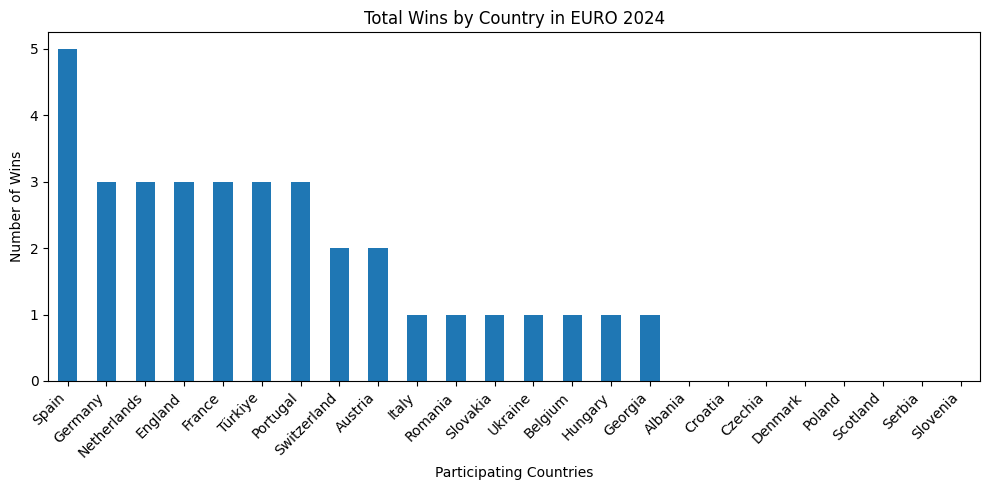

In [168]:
plt.figure(figsize=(10, 5))  # figsize=(Breite, Höhe) in Zoll

most_wins.plot(kind="bar")
plt.title("Total Wins by Country in EURO 2024")
plt.xlabel("Participating Countries")
plt.ylabel("Number of Wins")

plt.xticks(
    rotation=45, ha="right"
)  # rotation=Gradzahl, ha='right' für rechtsbündige Ausrichtung

plt.tight_layout()
plt.show()

In [181]:
all_draws = df_finished[df_finished["winner"].isna()]
draw_home = all_draws["home_team"].value_counts()
draw_away = all_draws["away_team"].value_counts()

total_draws = draw_home.add(draw_away, fill_value=0)
total_draws = total_draws.astype(int)
total_draws.sort_values(ascending=False, inplace=True)

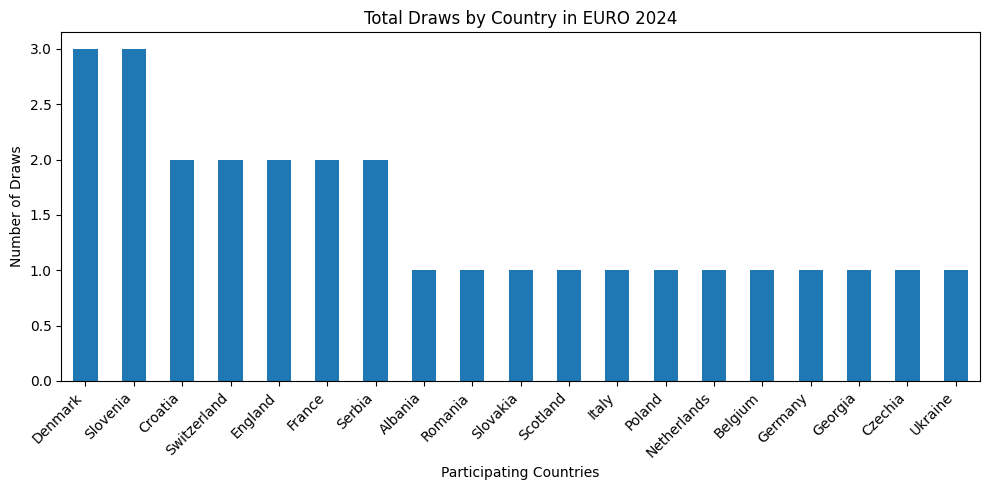

In [182]:
plt.figure(figsize=(10, 5))  # figsize=(Breite, Höhe) in Zoll

total_draws.plot(kind="bar")
plt.title("Total Draws by Country in EURO 2024")
plt.xlabel("Participating Countries")
plt.ylabel("Number of Draws")

plt.xticks(
    rotation=45, ha="right"
)  # rotation=Gradzahl, ha='right' für rechtsbündige Ausrichtung

plt.tight_layout()
plt.show()

In [203]:
df_losses = df_finished[df_finished["winner"].notna()]

df_home_loss = df_losses.loc[df_losses["home_team"] != df_losses["winner"]]
loss_home = df_home_loss["home_team"].value_counts()

df_away_loss = df_losses.loc[df_losses["away_team"] != df_losses["winner"]]
loss_away = df_away_loss["away_team"].value_counts()

total_losses = loss_home.add(loss_away, fill_value=0)
total_losses = total_losses.astype(int)
total_losses.sort_values(ascending=False, inplace=True)


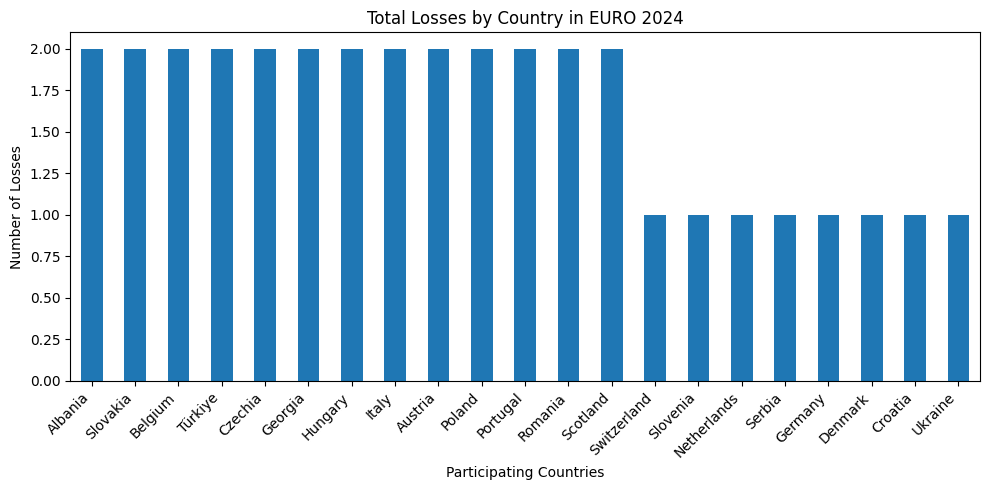

In [205]:
plt.figure(figsize=(10, 5))  # figsize=(Breite, Höhe) in Zoll

total_losses.plot(kind="bar")
plt.title("Total Losses by Country in EURO 2024")
plt.xlabel("Participating Countries")
plt.ylabel("Number of Losses")

plt.xticks(
    rotation=45, ha="right"
)  # rotation=Gradzahl, ha='right' für rechtsbündige Ausrichtung

plt.tight_layout()
plt.show()

In [16]:
total_goals = {}
# for team in teams:
# if team in

In [12]:
df_basic_stats = df[
    [
        "home_team",
        "away_team",
        "home_score",
        "away_score",
        "winner",
        "winner_reason",
        "date_time",
        "match_attendance",
        "stadium_capacity",
        "status",
    ]
]